## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df_combined = pd.DataFrame(combined_data)
#df_combined

len(df_combined)


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df_combined[df_combined.duplicated()]



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_combined.drop_duplicates(subset=['Mouse ID'], keep='first')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [6]:
# Checking the number of mice in the clean DataFrame.
df_combined.iloc[130:140,:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
130,a788,0,45.0,0,Zoniferol,Male,5,30
131,s337,0,45.0,0,Zoniferol,Male,14,27
132,q511,0,45.0,0,Zoniferol,Female,2,28
133,m331,0,45.0,0,Zoniferol,Female,19,26
134,o926,0,45.0,0,Zoniferol,Male,15,29
135,d133,0,45.0,0,Zoniferol,Male,5,30
136,n630,0,45.0,0,Propriva,Female,15,29
137,g989,0,45.0,0,Propriva,Female,21,26
138,a401,0,45.0,0,Zoniferol,Female,8,25
139,w350,0,45.0,0,Propriva,Male,7,26


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
drug_regimen = df_combined.groupby('Drug Regimen')

#Create variables for each statistic
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
variance = drug_regimen['Tumor Volume (mm3)'].var()
stdv = drug_regimen['Tumor Volume (mm3)'].std()
sem = drug_regimen['Tumor Volume (mm3)'].sem()




In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Put variables into Dataframe and print out
summary_table = pd.DataFrame({'Mean':mean,
                             'Median':median,
                             'Variance':variance,
                             'Standard Deviation':stdv,
                             'SEM':sem})
summary_table
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

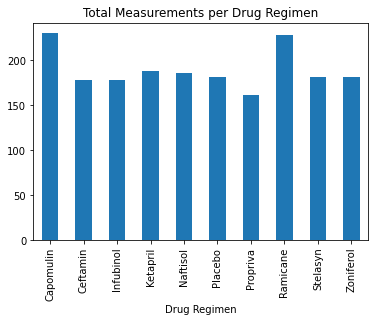

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Create dataframe to count the mice per regimen
regimen_count = pd.DataFrame(drug_regimen.count())

#Reset dataframe to include the counts
regimen_count = regimen_count.reset_index()

#Create bar chart
regimen_count.plot(kind='bar',x='Drug Regimen',y='Mouse ID', legend=False, title="Total Measurements per Drug Regimen")


plt.show()


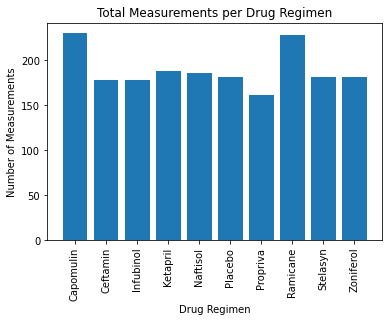

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen_count['Drug Regimen'],regimen_count['Mouse ID'])
plt.title('Total Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90)
plt.show()


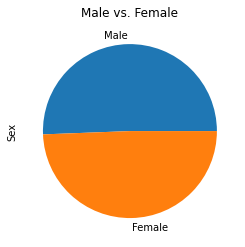

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create dataframe for just the sex
male_fm = pd.DataFrame(df_combined['Sex'].value_counts())
#male_fm

#Create pie chart 
male_fm.plot(kind='pie', y='Sex', legend=False, title="Male vs. Female")
plt.show()


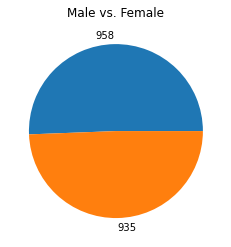

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_fm['Sex'], labels=male_fm['Sex'])
plt.title('Male vs. Female')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = drug_regimen.get_group('Capomulin')
ramicane = drug_regimen.get_group('Ramicane')
infubinol = drug_regimen.get_group('Infubinol')
ceftamin = drug_regimen.get_group('Ceftamin')


# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin.drop_duplicates(subset={'Mouse ID'}, keep='last')
ramicane_last = ramicane.drop_duplicates(subset={'Mouse ID'}, keep='last')
infubinol_last = infubinol.drop_duplicates(subset={'Mouse ID'}, keep='last')
ceftamin_last = ceftamin.drop_duplicates(subset={'Mouse ID'}, keep='last')

#capomulin_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol = capomulin_last.merge(ramicane_last, how='outer')
tumor_vol = tumor_vol.merge(infubinol_last, how='outer')
tumor_vol = tumor_vol.merge(ceftamin_last, how='outer')
total_tumor_vol = tumor_vol

total_tumor_vol



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,w150,10,39.952347,0,Capomulin,Male,23,23
1,r157,15,46.539206,0,Capomulin,Male,22,25
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,j246,35,38.753265,1,Capomulin,Female,21,21
4,b128,45,38.982878,2,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
95,k210,45,68.923185,3,Ceftamin,Male,15,28
96,x822,45,61.386660,3,Ceftamin,Male,3,29
97,l733,45,64.299830,1,Ceftamin,Female,4,30
98,o287,45,59.741901,4,Ceftamin,Male,2,28


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = total_tumor_vol["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i, treatment in enumerate(treatments):
    df_outliers = total_tumor_vol.loc[(total_tumor_vol["Drug Regimen"] == treatment)]
    tumor_vol.append(df_outliers[["Drug Regimen","Tumor Volume (mm3)"]])
    
    
    first_qurtile = df_outliers["Tumor Volume (mm3)"].quantile(0.25)
    third_quartile = df_outliers["Tumor Volume (mm3)"].quantile(0.75)
    
    
    iqr = third_quartile - first_qurtile
    
    
    lower_bound = round(first_qurtile - (1.5 * iqr),2)
    upper_bound = round(third_quartile + (1.5 * iqr),2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
summary_df = total_tumor_vol.groupby('Drug Regimen')
summary_df

drug_df = summary_df.to_frame()
drug_df

four_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

graph_df = drug_df.reset_index()

tumors = graph_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
tumor_df = pd.DataFrame(tumors)
tumor_df = tumor_df.reindex(total_tumor_vol)
tumor_df = [vol for vol in tumor_df["Tumor Volume (mm3)"]]
fliers = dict(marker='o', markerfacecolor='r', markersize=12)
plt.boxplot(tumor_df, labels=total_tumor_vol, flierprops=fliers)
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimens")
plt.title("Tumor Volume by Drug Regimen")
plt.show()

AttributeError: 'list' object has no attribute 'groupby'

## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_values = total_tumor_vol['Timepoint']
y_values = total_tumor_vol['Tumor Volume (mm3)']
plt.plot(x_values, y_values)

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint for Capomulin")
plt.show()

TypeError: list indices must be integers or slices, not str

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = total_tumor_vol['Weight (g)']
y_values = total_tumor_vol['Tumor Volume (mm3)']
plt.plot(x_values, y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint for Capomulin")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
